# Correlate immune and Wnt signaling NES

Script related to figure s1g, h

### Aim:
- Evaluate correlation of immune and Wnt signaling NES

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

In [3]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Load data

In [5]:
file_keys = home + "/Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt"

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [6]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


In [7]:
sample_labels.index

Index(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10',
       'A11', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09',
       'B10', 'B11', 'B12', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07',
       'C08', 'C09', 'C10', 'C11', 'C12', 'D01', 'D02', 'D03'],
      dtype='object', name='Well')

In [8]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("Set1", 8).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

In [9]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

sample_labels['Site_marker'] = sample_labels['Site'].replace(sites,markers)

In [10]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


In [12]:
mRNA_tumcell_file = home + "/Data/1/TreatmentNaive_log2exp_loess_norm_filtered_ESTIMATE.txt"

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

In [13]:
mRNA_tumcell.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,213.898183,441.185072,627.161634,-257.879171,-105.932457,-179.742309,-667.871861,-554.187271,-467.547274,-424.048973,...,276.215651,819.700176,542.094611,446.049523,100.214812,640.683420,1028.302292,631.494907,843.594952,-393.705822
ImmuneScore,789.397143,1103.963967,996.569838,119.238243,354.124225,197.378769,-395.243536,-16.422432,-469.452988,-563.011739,...,-18.442529,526.734281,-25.089182,238.412959,-60.730519,890.081437,776.296638,680.327079,892.726571,-226.504212
ESTIMATEScore,1003.295326,1545.149039,1623.731472,-138.640928,248.191767,17.636459,-1063.115397,-570.609703,-937.000262,-987.060713,...,257.773122,1346.434456,517.005428,684.462482,39.484294,1530.764858,1804.598930,1311.821985,1736.321523,-620.210034
TumorPurity,0.730147,0.673548,0.664978,0.833913,0.801248,0.821034,0.900910,0.867208,0.892722,0.896009,...,0.800405,0.694819,0.777021,0.761314,0.819199,0.675108,0.644917,0.698464,0.652544,0.870811


In [14]:
sample_labels['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity']

In [15]:
file_nes = home + "/Data/1/HallmarksStromaImmune_NES.txt"

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

In [16]:
data_nes.index

Index(['HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_HYPOXIA',
       'HALLMARK_CHOLESTEROL_HOMEOSTASIS', 'HALLMARK_MITOTIC_SPINDLE',
       'HALLMARK_WNT_BETA_CATENIN_SIGNALING', 'HALLMARK_TGF_BETA_SIGNALING',
       'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_DNA_REPAIR',
       'HALLMARK_G2M_CHECKPOINT', 'HALLMARK_APOPTOSIS',
       'HALLMARK_NOTCH_SIGNALING', 'HALLMARK_ADIPOGENESIS',
       'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ESTROGEN_RESPONSE_LATE',
       'HALLMARK_ANDROGEN_RESPONSE', 'HALLMARK_MYOGENESIS',
       'HALLMARK_PROTEIN_SECRETION', 'HALLMARK_INTERFERON_ALPHA_RESPONSE',
       'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_APICAL_JUNCTION',
       'HALLMARK_APICAL_SURFACE', 'HALLMARK_HEDGEHOG_SIGNALING',
       'HALLMARK_COMPLEMENT', 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE',
       'HALLMARK_PI3K_AKT_MTOR_SIGNALING', 'HALLMARK_MTORC1_SIGNALING',
       'HALLMARK_E2F_TARGETS', 'HALLMARK_MYC_TARGETS_V1',
       'HALLMARK_MYC_TARGETS_V2', 'HALLMARK_EPITHELIAL_MES

In [19]:
sample_labels['WNT'] = data_nes.loc['HALLMARK_WNT_BETA_CATENIN_SIGNALING']

In [20]:
sample_labels['Immune'] = data_nes.loc['ImmuneSignature']

In [21]:
x = "WNT"
y = "Immune"

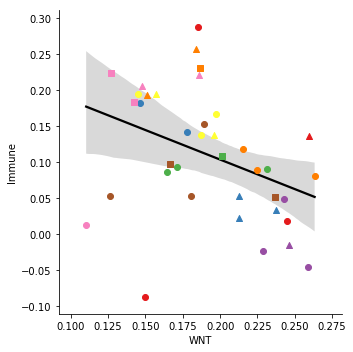

In [22]:
g = sns.lmplot(x=x,
               y=y,
               data=sample_labels,
               truncate=True,
               scatter_kws={'color':'None'},
               line_kws={'color':'k',
                         'zorder':0})

for sample in sample_labels.index:
    
    x_tumcell = sample_labels[x][sample]
    y_tumcell = sample_labels[y][sample]
    colour = sample_labels.Colour[sample]
    marker = sample_labels.Site_marker[sample]
    
    plt.scatter(x_tumcell,
                y_tumcell,
                marker=marker,
                c=colour,
                zorder=1)
    
sns.despine(trim=False)

In [23]:
ls ../../Figures/main/1/

OVCT_Fig_m1.pdf  OVCT_Fig_m1.png  README.md        panels/


In [24]:
FILE = "../../Figures/supplementary/1/panels/s1g_WNT_Immune_corr.pdf"

g.savefig(FILE, bbox='tight')

### Calculate normality of distribution


In [25]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

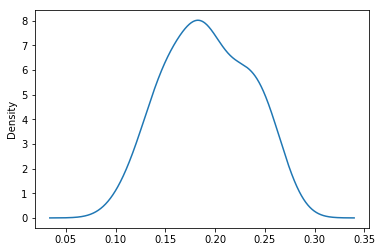

In [26]:
sample_labels[x].dropna().plot(kind="kde")

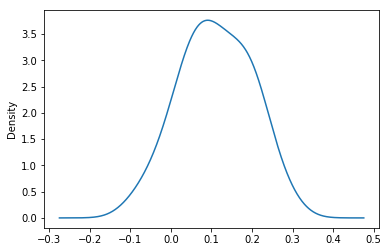

In [27]:
sample_labels[y].dropna().plot(kind="kde")

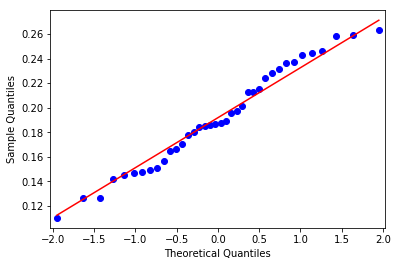

In [28]:
f = qqplot(sample_labels[x].dropna(),
       line='s')

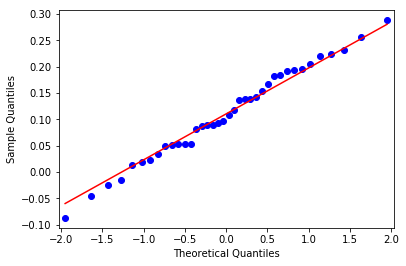

In [29]:
f = qqplot(sample_labels[y].dropna(),line='s')

In [31]:
scipy.stats.shapiro(sample_labels[x].dropna())

# Looks normal

(0.969440758228302, 0.37687063217163086)

In [32]:
scipy.stats.shapiro(sample_labels[y].dropna())

# Looks normal

(0.9881640672683716, 0.9531522393226624)

In [33]:
scipy.stats.normaltest(sample_labels[x].dropna())

# Looks normal

NormaltestResult(statistic=3.00942779215568, pvalue=0.22208082293803197)

In [34]:
scipy.stats.normaltest(sample_labels[y].dropna())

# Looks normal

NormaltestResult(statistic=0.5585690659583893, pvalue=0.7563246732839647)

In [35]:
scipy.stats.anderson(sample_labels[x].dropna(), 'norm')

# Looks normal

AndersonResult(statistic=0.3397931278484734, critical_values=array([0.529, 0.603, 0.723, 0.844, 1.004]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [36]:
scipy.stats.anderson(sample_labels[y].dropna(), 'norm')

# Looks normal

AndersonResult(statistic=0.18480817937317084, critical_values=array([0.529, 0.603, 0.723, 0.844, 1.004]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [37]:
scipy.stats.bartlett(
    sample_labels[x],
    sample_labels[y]
)

# not same variance (heteroscedastic)

BartlettResult(statistic=19.450528298430154, pvalue=1.0323927972177562e-05)

In [38]:
scipy.stats.levene(
    sample_labels[x],
    sample_labels[y]
)

# not same variance (heteroscedastic)

LeveneResult(statistic=19.054915478437366, pvalue=4.059763142020858e-05)

Use kendall

In [39]:
kendalltau(list(sample_labels.dropna()[x]),
           list(sample_labels.dropna()[y]), method="asymptotic")

KendalltauResult(correlation=-0.34285714285714286, pvalue=0.0032598081188732436)

In [40]:
set(sample_labels["Case_mRNA"])

{1, 4, 5, 6, 10, 13, 16, 17}

### Plot each patient independently

1
4
5
6
10
13
16
17


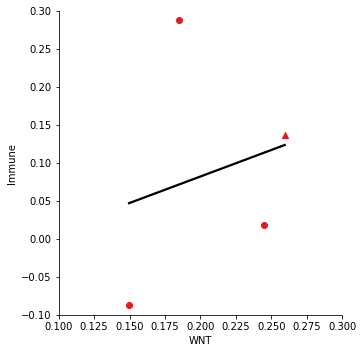

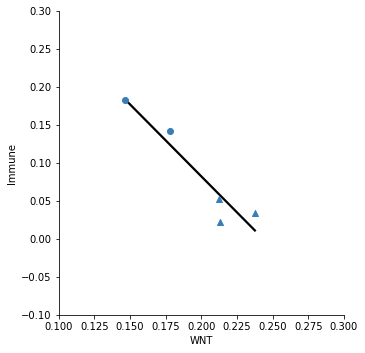

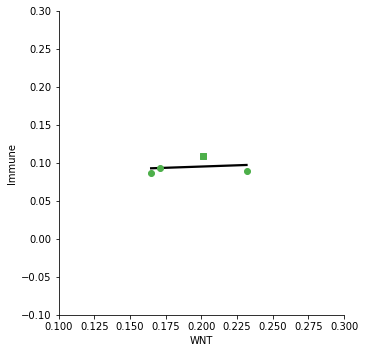

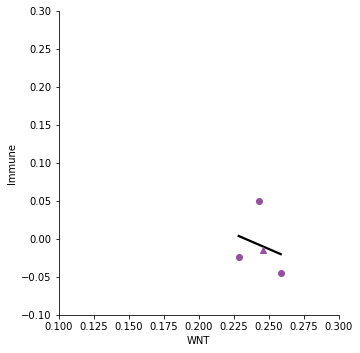

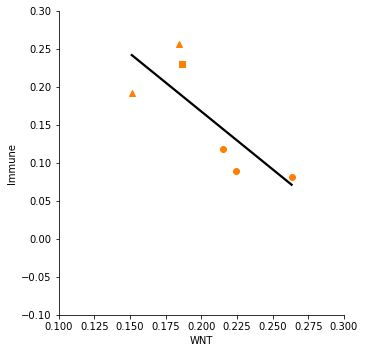

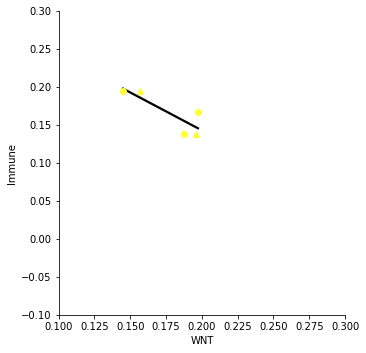

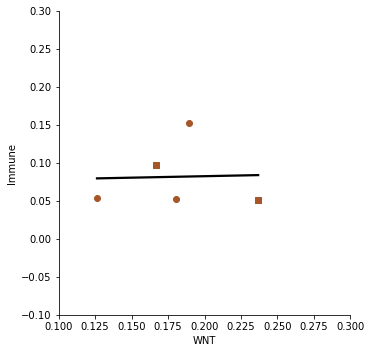

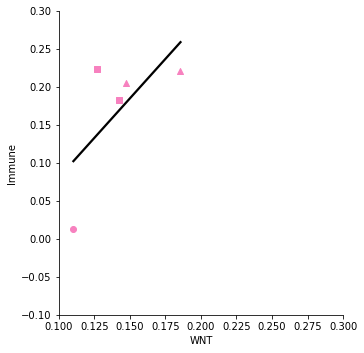

In [45]:
correlations = []
for case in set(sample_labels["Case_mRNA"]):
    
    print(case)
    
    df = sample_labels[sample_labels["Case_mRNA"] == case]

    g = sns.lmplot(x=x,
                   y=y,
                   data=df,
                   truncate=True,
                   ci=None,
                   scatter_kws={'color':'None'},
                   line_kws={'color':'k',
                             'zorder':0})

    for sample in df.index:

        x_tumcell = df[x][sample]
        y_tumcell = df[y][sample]
        colour = df.Colour[sample]
        marker = df.Site_marker[sample]

        plt.scatter(x_tumcell,
                    y_tumcell,
                    marker=marker,
                    c=colour,
                    zorder=1)

    sns.despine(trim=False)
    
    axes = g.axes

    axes[0,0].set_xlim(0.1,0.3)
    axes[0,0].set_ylim(-0.1,0.3)
    
    f = "../../Figures/supplementary/1/panels/s1g_WNT_Immune_corr_%s.pdf" % case
    
    g.savefig(f, bbox='tight')

In [46]:
import scipy.stats

In [47]:
df = sample_labels[sample_labels["Case_mRNA"] == 1]

In [48]:
scipy.stats.normaltest(sample_labels[x].dropna())

NormaltestResult(statistic=3.00942779215568, pvalue=0.22208082293803197)

In [49]:
scipy.stats.shapiro(df[x].dropna())[1]

0.5444501042366028

In [50]:
correlations = []
for case in set(sample_labels["Case_mRNA"]):

    print(str(case)+"\n")
    
    df = sample_labels[sample_labels["Case_mRNA"] == case]

    x_values = df[x].values
    y_values = df[y].values

    n1 = scipy.stats.shapiro(x_values)[1]
    n2 = scipy.stats.shapiro(y_values)[1]

    #n3 = scipy.stats.normaltest(x)[1]
    #n4 = scipy.stats.normaltest(y)[1]

    n5 = scipy.stats.anderson(x_values)
    n6 = scipy.stats.anderson(y_values)

    if min([n1,n2]) < 0.05: # it's not normal

        print("NOT normal")

        h1 = scipy.stats.levene(x_values, y_values)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
            #print(h1)
        else:
            print("HOMOscedastic\n")

    else:

        print("Normal")

        h1 = scipy.stats.bartlett(x_values,y_values)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
        else:
            print("HOMOscedastic\n")

    if min([n1,n2,h1]) < 0.05:

        print("KENDALL")

        print(scipy.stats.kendalltau(x_values,y_values,method="asymptotic"))
        
        cor, p_val = scipy.stats.kendalltau(x_values,y_values)

    else:

        print("anderson")

        print(n5[0], n5[1])
        print(n6[0], n6[1])
        print("\n")

        print("PEARSON")
        print(scipy.stats.pearsonr(x_values,y_values))

        print("\n")
        
        cor, p_val = scipy.stats.pearsonr(x_values,y_values)
                
    correlations.append((str(case),cor,p_val))

1

Normal
HOMOscedastic

anderson
0.26160603825789686 [1.317 1.499 1.799 2.098 2.496]
0.16657957840905535 [1.317 1.499 1.799 2.098 2.496]


PEARSON
(0.22232237062332744, 0.7776776293766725)


4

Normal
HOMOscedastic

anderson
0.26763929568196687 [0.72  0.82  0.984 1.148 1.365]
0.39356816077509205 [0.72  0.82  0.984 1.148 1.365]


PEARSON
(-0.9462719966524533, 0.014828716316070334)


5

Normal
HOMOscedastic

anderson
0.27194120476146466 [1.317 1.499 1.799 2.098 2.496]
0.407338716145472 [1.317 1.499 1.799 2.098 2.496]


PEARSON
(0.20540373672160364, 0.7945962632783964)


6

Normal
HOMOscedastic

anderson
0.20696541707660998 [1.317 1.499 1.799 2.098 2.496]
0.3468550866746778 [1.317 1.499 1.799 2.098 2.496]


PEARSON
(-0.2415688742325786, 0.7584311257674214)


10

Normal
HOMOscedastic

anderson
0.18520444514903378 [0.592 0.675 0.809 0.944 1.123]
0.3339377657805853 [0.592 0.675 0.809 0.944 1.123]


PEARSON
(-0.7841008142339718, 0.06488689171253635)


13

Normal
HOMOscedastic

anderson
0.416

In [51]:
correlations

[('1', 0.22232237062332744, 0.7776776293766725),
 ('4', -0.9462719966524533, 0.014828716316070334),
 ('5', 0.20540373672160364, 0.7945962632783964),
 ('6', -0.2415688742325786, 0.7584311257674214),
 ('10', -0.7841008142339718, 0.06488689171253635),
 ('13', -0.8423023735190344, 0.07337061250319571),
 ('16', 0.035140196703983245, 0.9552673217828516),
 ('17', 0.39999999999999997, 0.48333333333333334)]

In [52]:
pvals = [corr[2] for corr in correlations]

pvals

[0.7776776293766725,
 0.014828716316070334,
 0.7945962632783964,
 0.7584311257674214,
 0.06488689171253635,
 0.07337061250319571,
 0.9552673217828516,
 0.48333333333333334]

## Compare Wnt NEAS between Low vs High tumor cellularity

In [53]:
sample_labels

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES,TumourCellularity_mRNA,WNT,MYC1,MYC2,Immune
Well,,,,,,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973,0.730147,0.151231,0.638069,0.233093,0.192483
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065,0.673548,0.184140,0.636311,0.211932,0.256464
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551,0.664978,0.186732,0.623494,0.230913,0.230664
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496,0.833913,0.263275,0.587537,0.265719,0.080746
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706,0.801248,0.215427,0.609915,0.236332,0.117609
A06,A06_3640_19_R_Adnexa,case10_Radnexa_green,10,ovary,green,10.0,19,#ff7f00,o,0.6695,0.821034,0.224450,0.668097,0.253874,0.089100
A07,A07_3436_3_Omentum,case6_omentum_blue,6,omentum,blue,6.0,3,#984ea3,^,0.7275,0.900910,0.246089,0.631927,0.323947,-0.014748
A08,A08_3436_12_Ovary,case6_ovary_yellow,6,ovary,yellow,6.0,12,#984ea3,o,0.7929,0.867208,0.243030,0.671235,0.273274,0.049217
A09,A09_3436_13_Ovary,case6_ovary_blue,6,ovary,blue,6.0,13,#984ea3,o,0.7211,0.892722,0.228552,0.725842,0.357547,-0.023908


In [54]:
TumourCellularity_WES_med = sample_labels["TumourCellularity_WES"].median()

In [55]:
import numpy as np

In [56]:
low = []
high = []
for well in sample_labels.index:
    
    if np.isnan(sample_labels["TumourCellularity_WES"][well]) == False:
    
        TumorCellularity = sample_labels["TumourCellularity_WES"][well]

        if TumorCellularity > TumourCellularity_WES_med:

            high.append(sample_labels[x][well])

        else:

            low.append(sample_labels[x][well])

In [57]:
np.isnan(sample_labels["TumourCellularity_WES"][well])

False

In [58]:
label = []
for i in range(len(low)):
    
    label.append("low")

In [59]:
for i in range(len(high)):
    
    label.append("high")

In [60]:
cold_hot_df = pd.DataFrame({
    "label" : pd.Series(label),
    "WNT" : pd.Series(low+high)
})

cold_hot_df

,label,WNT
0,low,0.151231
1,low,0.184140
2,low,0.186732
3,low,0.184879
4,low,0.177905
5,low,0.231615
6,low,0.170827
7,low,0.164771
8,low,0.156838
9,low,0.195614


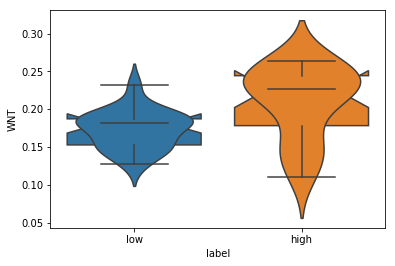

In [61]:
fig, ax = plt.subplots()

sns.violinplot(x="label",
               y="WNT",
               data=cold_hot_df,
               inner=None,
               split=False,
               scale="count",
               zorder=0,
               width=0.7,
               alpha=0.3)

sns.boxplot(x="label",
            y="WNT",
            data=cold_hot_df,
            notch=True
           )

#ax.set_ylim(0.1,0.3)

In [62]:
fig = ax.get_figure()

In [63]:
fig.savefig("../../Figures/supplementary/1/panels/s1h_WNT_WESTumCell_diff.pdf")

In [64]:
import scipy.stats

In [65]:
cold_hot_df

,label,WNT
0,low,0.151231
1,low,0.184140
2,low,0.186732
3,low,0.184879
4,low,0.177905
5,low,0.231615
6,low,0.170827
7,low,0.164771
8,low,0.156838
9,low,0.195614


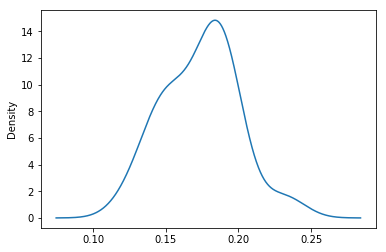

In [67]:
cold_hot_df[cold_hot_df["label"]=="low"]["WNT"].dropna().plot(kind="kde")

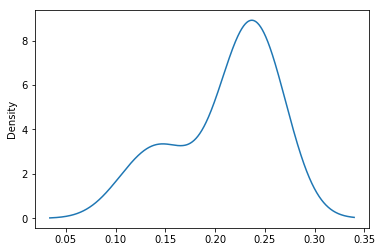

In [68]:
cold_hot_df[cold_hot_df["label"]=="high"]["WNT"].dropna().plot(kind="kde")

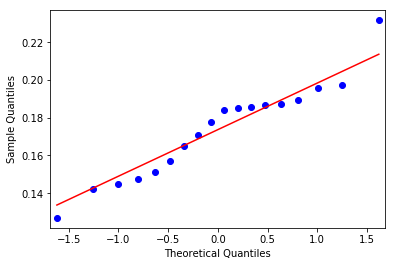

In [69]:
f = qqplot(cold_hot_df[cold_hot_df["label"]=="low"]["WNT"].dropna(),line='s')

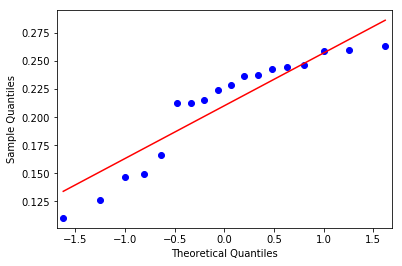

In [70]:
f = qqplot(cold_hot_df[cold_hot_df["label"]=="high"]["WNT"].dropna(),line='s')

In [71]:
scipy.stats.shapiro(cold_hot_df[cold_hot_df["label"]=="low"]["WNT"].dropna())

# Looks normal

(0.955740749835968, 0.521945059299469)

In [72]:
scipy.stats.shapiro(cold_hot_df[cold_hot_df["label"]=="high"]["WNT"].dropna())

# Looks NOT normal

(0.8634982109069824, 0.013927695341408253)

In [73]:
scipy.stats.normaltest(cold_hot_df[cold_hot_df["label"]=="low"]["WNT"].dropna())

# Looks normal

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.35528702133609513, pvalue=0.8372408377217851)

In [74]:
scipy.stats.normaltest(cold_hot_df[cold_hot_df["label"]=="high"]["WNT"].dropna())

# Looks normal

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=3.100335080681467, pvalue=0.21221241670759725)

In [75]:
scipy.stats.anderson(cold_hot_df[cold_hot_df["label"]=="low"]["WNT"].dropna(), 'norm')

# Looks normal

AndersonResult(statistic=0.41375499956610895, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [76]:
scipy.stats.anderson(cold_hot_df[cold_hot_df["label"]=="high"]["WNT"].dropna(), 'norm')

# Looks normal

AndersonResult(statistic=1.0177206420673315, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [77]:
scipy.stats.bartlett( # for normal distribution
    cold_hot_df[cold_hot_df["label"]=="low"]["WNT"].dropna(),
    cold_hot_df[cold_hot_df["label"]=="high"]["WNT"].dropna()
)

# NOT same variance (heteroscedasticity)

BartlettResult(statistic=6.445775878007007, pvalue=0.011121645954425052)

Doesn't look normal and not homoscedasticity, so let's use 

In [79]:
scipy.stats.mannwhitneyu(
    cold_hot_df[cold_hot_df["label"]=="low"][x].dropna(),
    cold_hot_df[cold_hot_df["label"]=="high"][x].dropna(),
    alternative="two-sided", use_continuity=True
)

MannwhitneyuResult(statistic=81.0, pvalue=0.010868230307152529)

# End script